<a href="https://colab.research.google.com/github/aaabbbdddeee/MAT_422/blob/main/Assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Graph Models***

Graph Notation: A graph G is represented by G(V, E), where V is the set of nodes (vertices) and E is the set of edges. Edges can be directed (asymmetric, e.g., (v1, v2) ≠ (v2, v1)) or undirected (symmetric).

Paths and Cycles: A path is a sequence of edges connecting a sequence of distinct nodes, while a cycle is a closed path. Paths in directed graphs follow the direction of edges.

Shortest Paths: The shortest path between two nodes is the path with the minimum number of edges. It's also used to define the distance in network modeling.

Neighborhood: An n-hop neighborhood includes all nodes within n hops from a specified node.

Degree and Centrality: The degree of a node is the number of edges connected to it, with in-degrees and out-degrees defined for directed graphs. Degree centrality measures the importance of a node based on its connectivity.

Adjacency Matrix: Represents the connections between nodes, with a 1 or a weight indicating the presence of an edge, and a 0 indicating no edge.

Laplacian Matrix: A matrix representation that's particularly useful for many applications in graph theory, including finding the number of spanning trees, analyzing graph connectivity, and network robustness.

Incidence Matrix: Another matrix representation, which is useful for examining the relationships between nodes and edges directly.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from mpl_toolkits.mplot3d import Axes3D

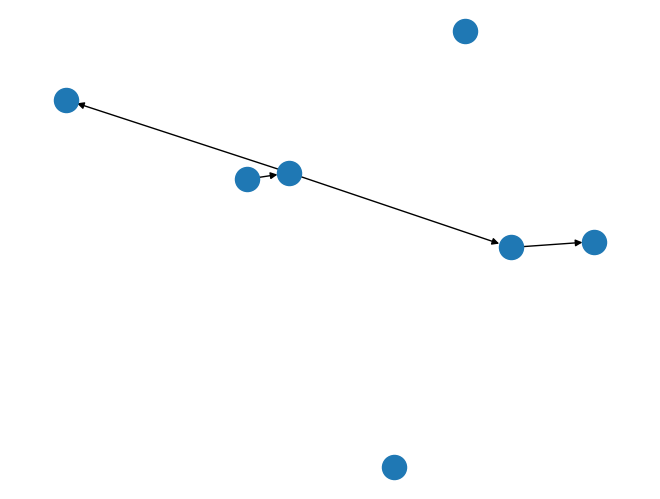

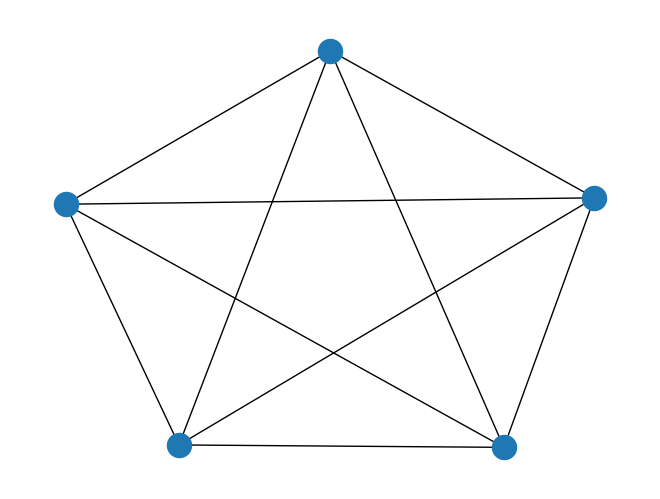

In [5]:
# the adjacency matrix is output as a graph.
G = nx.Graph()

# Generate a directed graph
G = nx.DiGraph()
G.add_node(1)
G.add_node(2)
G.add_nodes_from([3, 4, 5, 6])

G.add_edge(1, 3)
G.add_edges_from([(3, 5), (3, 6), (6, 7)])
nx.draw(G)
plt.show()

# Generate a graph without direction
G = nx.complete_graph(5)
nx.draw(G)
plt.show()

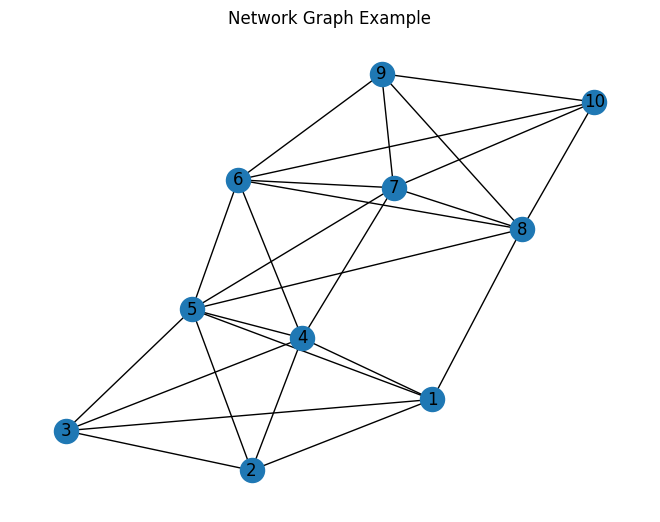

In [6]:
G = nx.Graph()

# Create 10 nodes
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Randomly connect the nodes
G.add_edges_from([
    (1, 2), (1, 3), (1, 4), (1, 5), (1, 8),
    (2, 3), (2, 4), (2, 5),
    (3, 4), (3, 5),
    (4, 5), (4, 6), (4, 7),
    (5, 6), (5, 7), (5, 8),
    (6, 7), (6, 8), (6, 9), (6, 10),
    (7, 8), (7, 9), (7, 10),
    (8, 9), (8, 10),
    (9, 10),
])

# Draw the graph
nx.draw(G, with_labels=True)
plt.title("Network Graph Example")
plt.show()


eig_val[:10]:  [1.41922064e-16 6.67244822e-04 8.21916065e-04 1.61591517e-03
 2.55192588e-03 2.94353631e-03 3.36980366e-03 4.47171078e-03
 5.05832241e-03 5.41636549e-03]
j:  1
[0.00066724 0.00082192]
[[4.76572856e+00 1.11586174e-12]
 [1.11586261e-12 4.98784096e+00]]


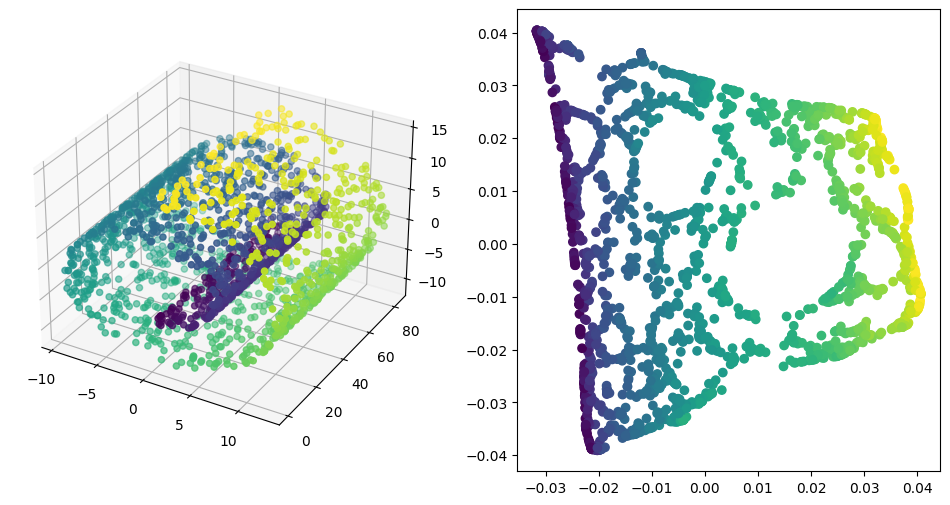

In [2]:
def make_swiss_roll(n_samples=100, noise=0.0, random_state=None):
    #Generate a swiss roll dataset.
    t = 1.5 * np.pi * (1 + 2 * np.random.rand(1, n_samples))
    x = t * np.cos(t)
    y = 83 * np.random.rand(1, n_samples)
    z = t * np.sin(t)
    X = np.concatenate((x, y, z))
    X += noise * np.random.randn(3, n_samples)
    X = X.T
    t = np.squeeze(t)
    return X, t

# rbf kernel function
def rbf(dist, t = 1.0):
    return np.exp(-(dist/t))

# calculate the Pairwise distance, x is matrix
# (a-b)^2 = a^2 + b^2 - 2*a*b
# returns the square of the distance between any two points
def cal_pairwise_dist(x):
    sum_x = np.sum(np.square(x), 1)
    dist = np.add(np.add(-2 * np.dot(x, x.T), sum_x).T, sum_x)
    return dist
def cal_rbf_dist(data, n_neighbors = 10, t = 1):
    dist = cal_pairwise_dist(data)
    dist[dist < 0] = 0
    n = dist.shape[0]
    rbf_dist = rbf(dist, t)
    W = np.zeros((n, n))
    for i in range(n):
        index_ = np.argsort(dist[i])[1:1+n_neighbors]
        W[i, index_] = rbf_dist[i, index_]
        W[index_, i] = rbf_dist[index_, i]
    return W

def le(data, n_dims = 2,
    n_neighbors = 5, t = 1.0):
    '''
    :param data: (n_samples, n_features)
    :param n_dims: target dim
    :param n_neighbors: k nearest neighbors
    :param t: a param for rbf
    :return:
    '''
    N = data.shape[0]
    W = cal_rbf_dist(data, n_neighbors, t)
    D = np.zeros_like(W)
    for i in range(N):
        D[i,i] = np.sum(W[i])

    D_inv = np.linalg.inv(D)
    L = D - W
    eig_val, eig_vec = np.linalg.eig(np.dot(D_inv, L))

    sort_index_ = np.argsort(eig_val)

    eig_val = eig_val[sort_index_]
    print("eig_val[:10]: ", eig_val[:10])

    j = 0
    while eig_val[j] < 1e-6:
        j+=1

    print("j: ", j)

    sort_index_ = sort_index_[j:j+n_dims]
    eig_val_picked = eig_val[j:j+n_dims]
    print(eig_val_picked)
    eig_vec_picked = eig_vec[:, sort_index_]

    print(np.dot(np.dot(eig_vec_picked.T, D), eig_vec_picked))

    X_ndim = eig_vec_picked
    return X_ndim

if __name__ == '__main__':
    X, Y = make_swiss_roll(n_samples = 2000)
    X_ndim = le(X, n_neighbors = 5, t = 20)

    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c = Y)

    ax2 = fig.add_subplot(122)
    ax2.scatter(X_ndim[:, 0], X_ndim[:, 1], c = Y)
    plt.show()